<a href="https://colab.research.google.com/github/smitpatel201/IntroToMachineLearning/blob/main/HW1_SmitPatel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Colab Notebooks/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()
df = pd.read_csv(file_path)
print (df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [4]:
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
y = df.values[:, 1]
m = len(y)  # Number of training examples
n = len(X1)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X1[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
m =  100
n =  100


In [5]:
from IPython.display import display
display(df)

X1 = df.values[:, 0]
X2 = df.values[:, 2]
X3 = df.values[:, 3]
y = df.values[:, 1]

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


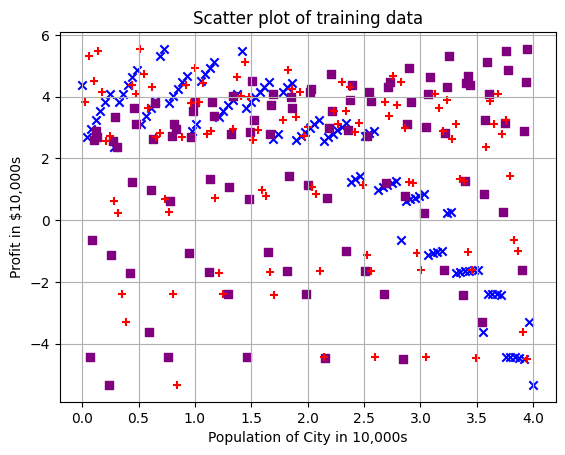

In [6]:
X1 = df.values[:, 0]  # get input values from the first column -- X is a list here which is a 1 dimentional array
X2 = df.values[:, 1]
X3 = df.values[:, 2]
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X1, y, color='blue', marker='x')
plt.scatter(X2, y, color='purple', marker='s')
plt.scatter(X3, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [7]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [8]:
X_1 = X1.reshape(m, 1)
X_1[:10]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [9]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]


array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [10]:
theta = np.zeros(2)
theta

array([0., 0.])

In [11]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [12]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [13]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [14]:
theta = [0., 0.]
iterations = 1500
alpha = 0.01

In [15]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


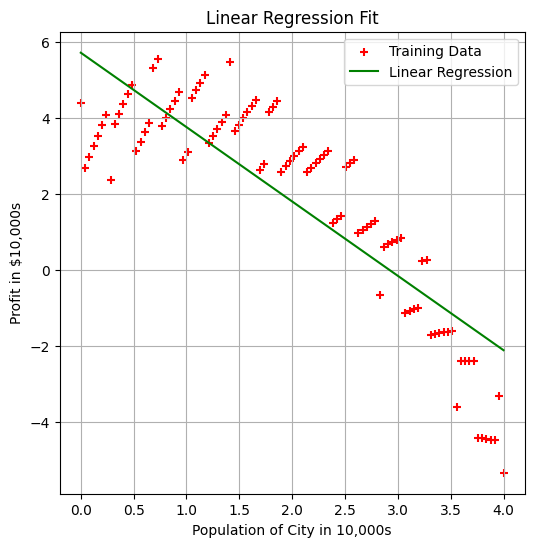

In [16]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


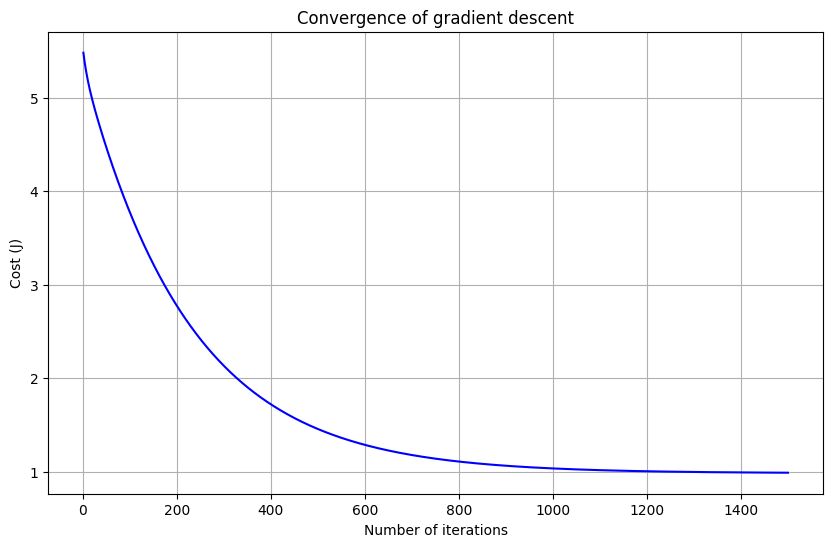

In [17]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [18]:
X_2 = X2.reshape(m, 1)
X_2[:10]

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [19]:
X_2_ = np.hstack((X_0, X_2))
X[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [20]:
theta_1 = np.zeros(2)
theta_1

array([0., 0.])

In [21]:
cost_1 = compute_cost(X_2_, y, theta_1)
print('The cost for given values of theta_0 and theta_1 =', cost_1)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [22]:
theta_1 = [0., 0.]
iterations = 1500
alpha = 0.01

In [23]:
theta_1, cost_history_1 = gradient_descent(X_2_, y, theta_1, alpha, iterations)
print('Final value of theta =', theta_1)
print('cost_history =', cost_history_1)

Final value of theta = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


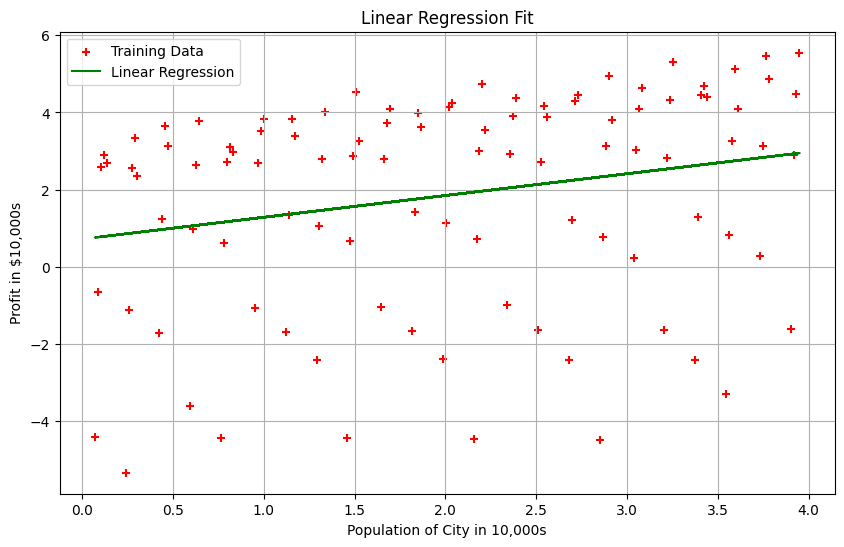

In [24]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X_2_[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X_2_[:, 1], X_2_.dot(theta_1), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

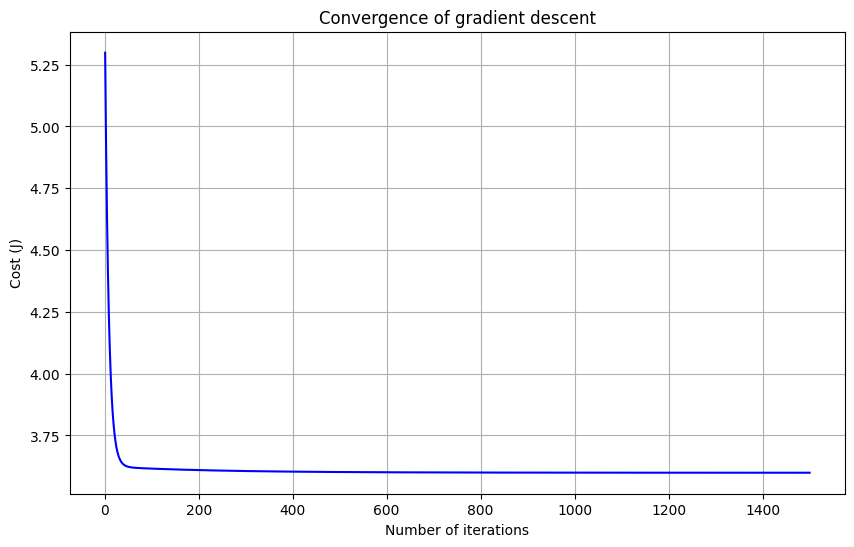

In [25]:
plt.plot(range(1, iterations + 1), cost_history_1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [26]:
X_3 = X3.reshape(m, 1)
X_3[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [27]:
X_3_ = np.hstack((X_0, X_3))
X[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [28]:
theta_2 = np.zeros(2)
theta_2

array([0., 0.])

In [29]:
cost_2 = compute_cost(X_3_, y, theta_2)
print('The cost for given values of theta_0 and theta_1 =', cost_2)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [30]:
theta_2 = [0., 0.]
iterations = 1500
alpha = 0.01

In [31]:
theta_2, cost_history_2 = gradient_descent(X_3_, y, theta_2, alpha, iterations)
print('Final value of theta =', theta_2)
print('cost_history =', cost_history_2)

Final value of theta = [ 2.78048129 -0.48451631]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


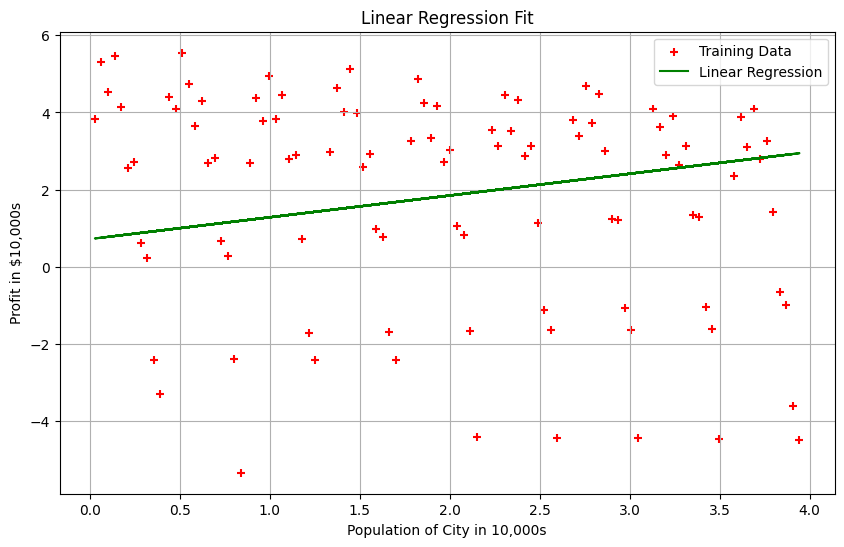

In [32]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X_3_[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X_3_[:, 1], X_3_.dot(theta_1), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

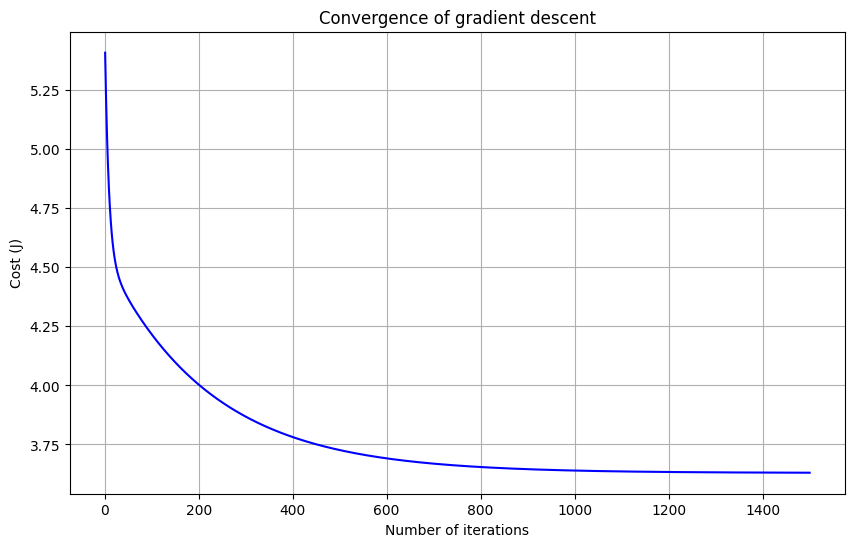

In [33]:
plt.plot(range(1, iterations + 1), cost_history_2, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [48]:
#QUESTION 2
X_4_ = np.hstack((X_0, X_1, X_2, X_3))
X[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [39]:
theta_4 = np.zeros(4)
theta_4

array([0., 0., 0., 0.])

In [40]:
cost_4 = compute_cost(X_4_, y, theta_4)
print('The cost for given values of theta_0 and theta_1 =', cost_4)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [43]:
theta_4 = [0., 0., 0., 0.]
iterations = 1500
alpha = 0.01

In [44]:
theta_4, cost_history_4 = gradient_descent(X_4_, y, theta_4, alpha, iterations)
print('Final value of theta =', theta_4)
print('cost_history =', cost_history_4)

Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


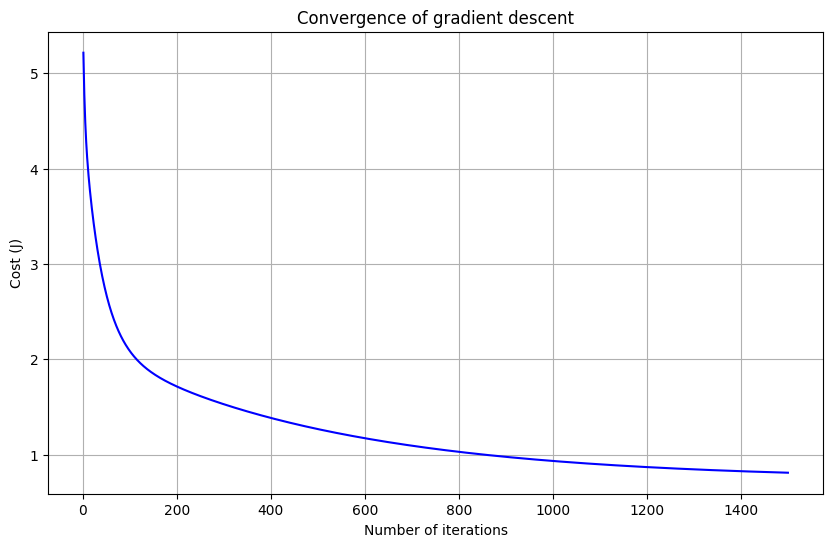

In [47]:
plt.plot(range(1, iterations + 1), cost_history_4, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [58]:
X_5_ = np.array([1,1,1,1])
X_5_[:5]

array([1, 1, 1, 1])

In [59]:
X_6_ = np.array([1,2,0,4])
X_6_[:5]

array([1, 2, 0, 4])

In [66]:
X_7_ = np.array([1,3,2,1])
X_7_[:5]

array([1, 3, 2, 1])

In [68]:
X_5_, X_6_, X_7_ = np.array([1,1,1,1])[:5], np.array([1,2,0,4])[:5], np.array([1,3,2,1])[:5]

In [67]:
theta_5 = [0., 0., 0., 0.]
iterations = 1500
alpha = 0.01

In [72]:
theta_6 = gradient_descent(X_5_, y, theta_5, alpha, iterations)

X_5_ = np.array([1,1,1,1])
predicted_y_5 = X_5_.dot(X_5_, X_6_, X_7_)
print("Predicted y for (1, 1, 1, 1) :", predicted_y_5)

X_6_ = np.array([1,2,0,4])
predicted_y_6 = X_6_.dot(X_5_, X_6_, X_7_)
print("Predicted y for (1, 2, 0, 4) :", predicted_y_6)

X_7_ = np.array([1,3,2,1])
predicted_y_7 = X_7_.dot(X_5_, X_6_, X_7_)
print("Predicted y for (1, 3, 2, 1) :", predicted_y_7)

ValueError: ignored